In [2]:
from drowsiness_detection.data import load_experiment_objects
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np

In [9]:
config, best_model, search_results = load_experiment_objects(experiment_id=14, log_dir="../../logs/")

max_depths = search_results.cv_results_["param_classifier__max_depth"]
min_samples = search_results.cv_results_["param_classifier__min_samples_split"]
scores = search_results.cv_results_["mean_test_score"]

<ipython-input-29-1073df489b0d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.logspace(1,4,num=7).astype(int).astype(str))


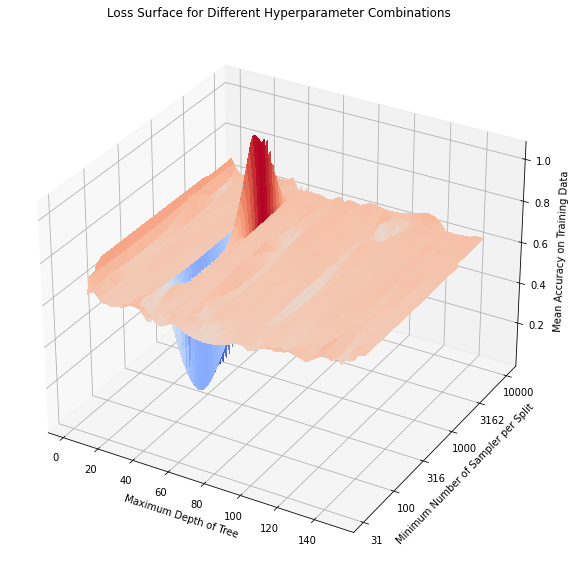

In [29]:
plt.rcParams["figure.figsize"] = 10,10
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

min_depth, max_depth = min(max_depths), max(max_depths)
min_min_samples, max_min_samples = min(min_samples), max(min_samples)
x1 = np.linspace(min_depth, max_depth, 100)
y1 = np.linspace(min_min_samples, max_min_samples, 100)
# Make data.
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata(points=(max_depths, min_samples), values=scores, xi=(x2,y2), method="cubic")

surf = ax.plot_surface(x2, y2, z2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_yticklabels(np.logspace(1,4,num=7).astype(int).astype(str))
ax.set_title('Loss Surface for Different Hyperparameter Combinations')
ax.set_ylabel('Minimum Number of Sampler per Split')
ax.set_xlabel('Maximum Depth of Tree')
ax.set_zlabel("Mean Accuracy on Training Data")

plt.show()